# **<center><span style= "color:#C25A7C;">Principal Component Analysis</span></center>**

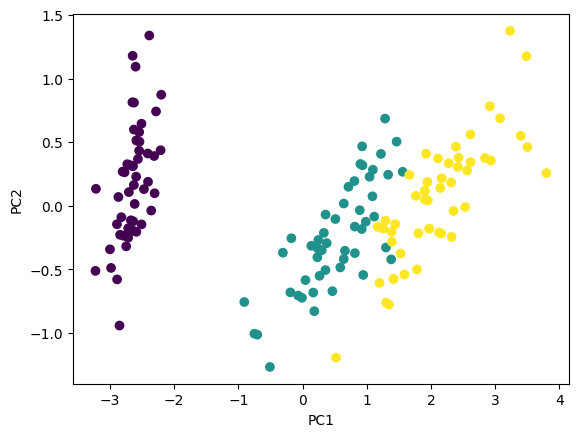

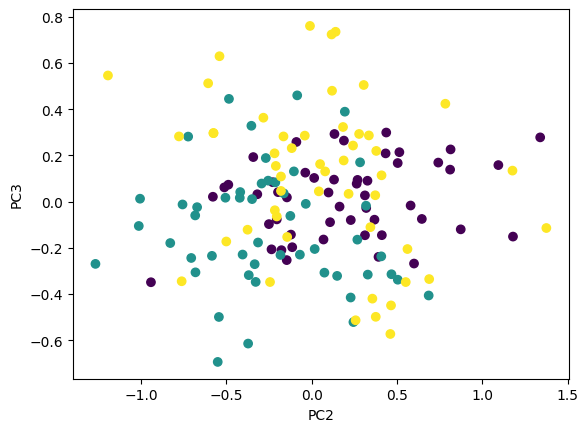

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Let's say we want to reduce the data to two dimensions
pca = PCA(n_components=3)

# Fit and transform the data
iris_pca = pca.fit_transform(iris.data)

# Now we can plot the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Now we can plot the 2 and 3 principal components
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()


# DO PCA on TIPs dataset?

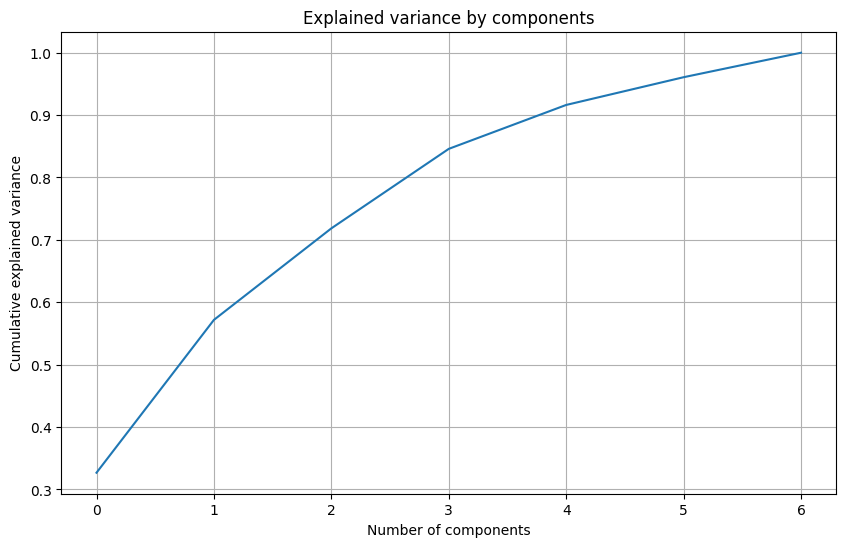

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.133642  0.164816  0.061756 -0.058183  0.378659   
tip         0.531650  0.178333  0.159316 -0.010375 -0.637807 -0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364  0.000506 -0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763  0.212334  0.111732   
day        -0.156579  0.660434 -0.047053  0.229846  0.003218  0.606759   
time       -0.281249  0.556479  0.266919  0.297170 -0.004329 -0.572115   
size        0.493317  0.261729 -0.055523 -0.148236  0.738039 -0.245190   

                 PC7  
total_bill  0.686390  
tip        -0.421978  
sex         0.007162  
smoker     -0.228151  
day        -0.340735  
time        0.352618  
size       -0.241370  


In [4]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# load the data
tips = sns.load_dataset('tips')
 
# preporcessing
# encode categorical data 

le = LabelEncoder()
cat_features = tips.select_dtypes(include='category').columns

for features in cat_features:
    tips[features] = le.fit_transform(tips[features])

# standardize the data
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

# apply PCA

pca = PCA()
X_pca = pca.fit_transform(tips_scaled)

# plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)


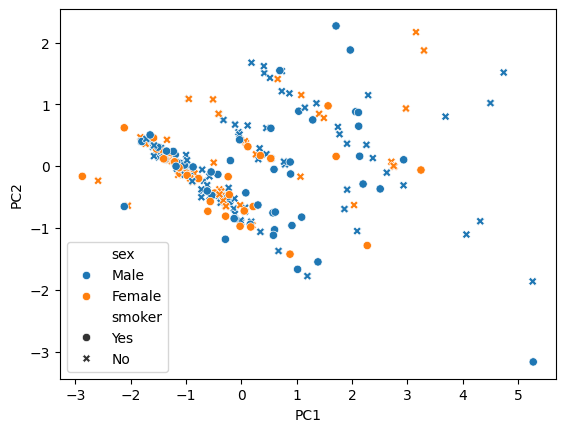

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')
plt.show()


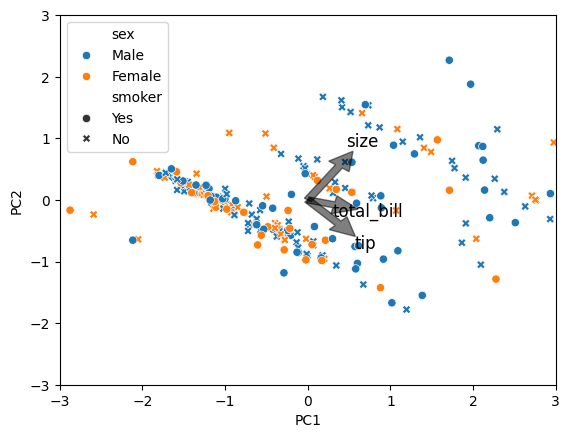

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


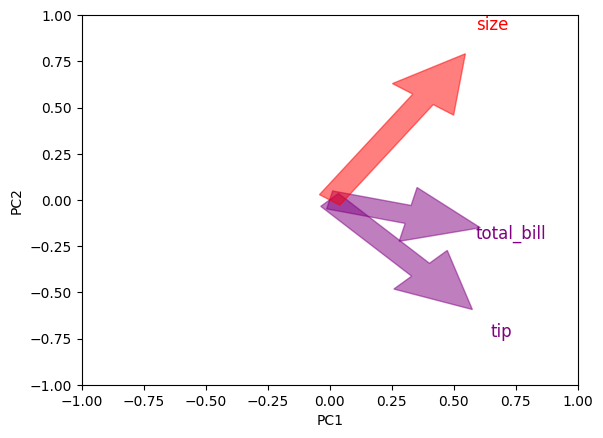

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


# Diamonds

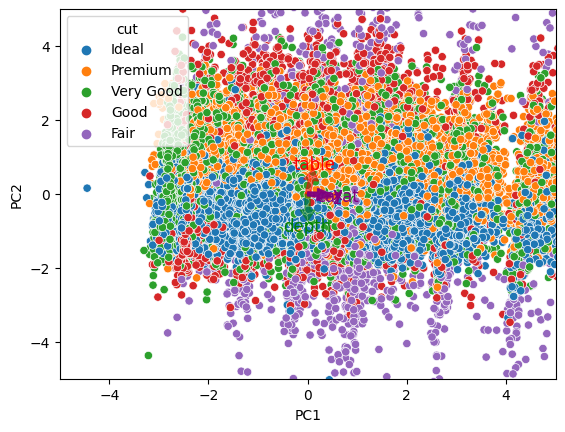

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
diamonds['PC1'] = X_pca[:, 0]
diamonds['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=diamonds, hue='cut')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,PC1,PC2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-3.058053,-0.367725
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-2.925839,2.322715
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-2.516531,5.002738
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-2.473886,0.032053
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-2.254885,-0.450277


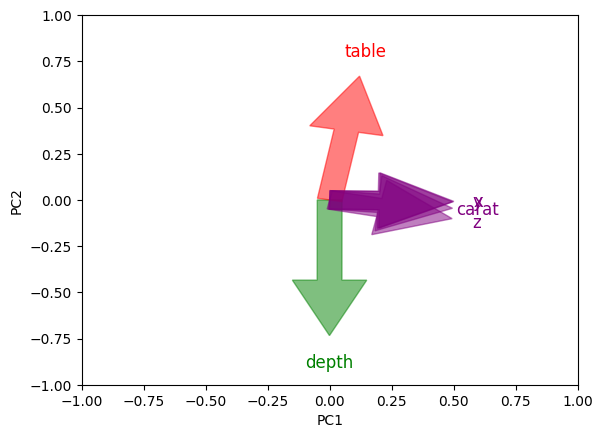

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


            PC1       PC2
carat  0.495367 -0.045130
depth -0.000682 -0.734082
table  0.120581  0.669827
x      0.500910 -0.008204
y      0.495218 -0.009657
z      0.493882 -0.101283


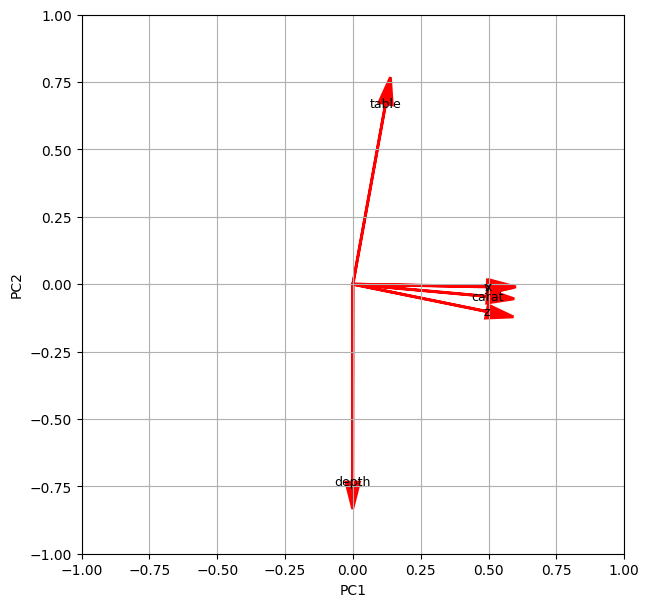

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()


            PC1       PC2       PC3       PC4       PC5       PC6
carat  0.495367 -0.045130 -0.027908 -0.789965 -0.160215  0.319502
depth -0.000682 -0.734082  0.671001  0.014030 -0.088358 -0.053638
table  0.120581  0.669827  0.732523  0.013456 -0.002961  0.003431
x      0.500910 -0.008204 -0.069979 -0.040759  0.048632 -0.860290
y      0.495218 -0.009657 -0.086227  0.537622 -0.635140  0.234074
z      0.493882 -0.101283  0.007509  0.291338  0.748831  0.316450


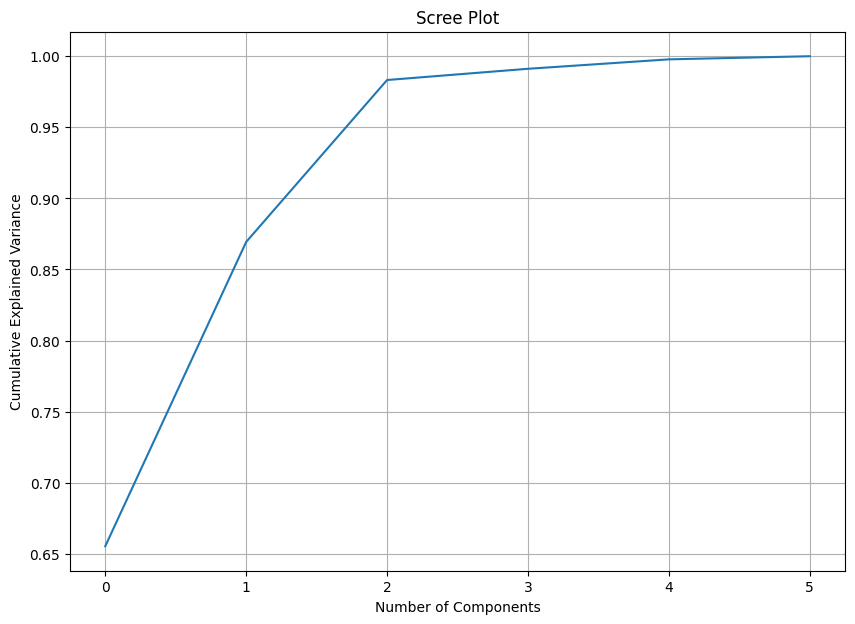

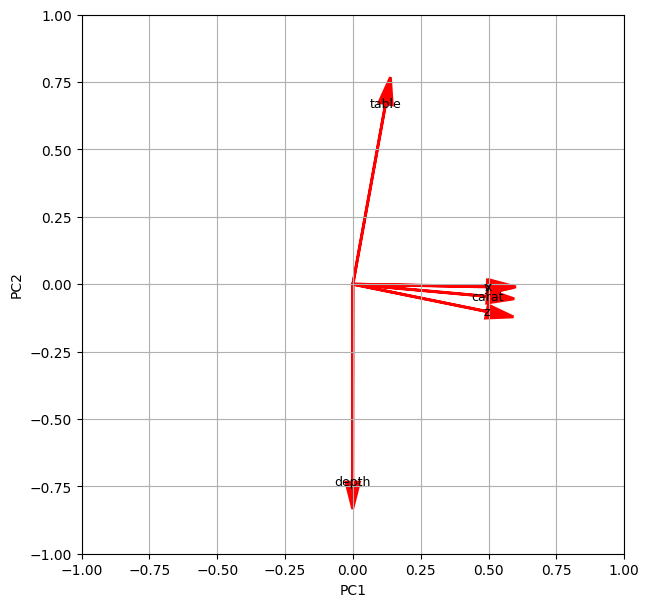

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with all components
pca = PCA()
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print(loadings)

# Plot the explained variance (Scree Plot)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()


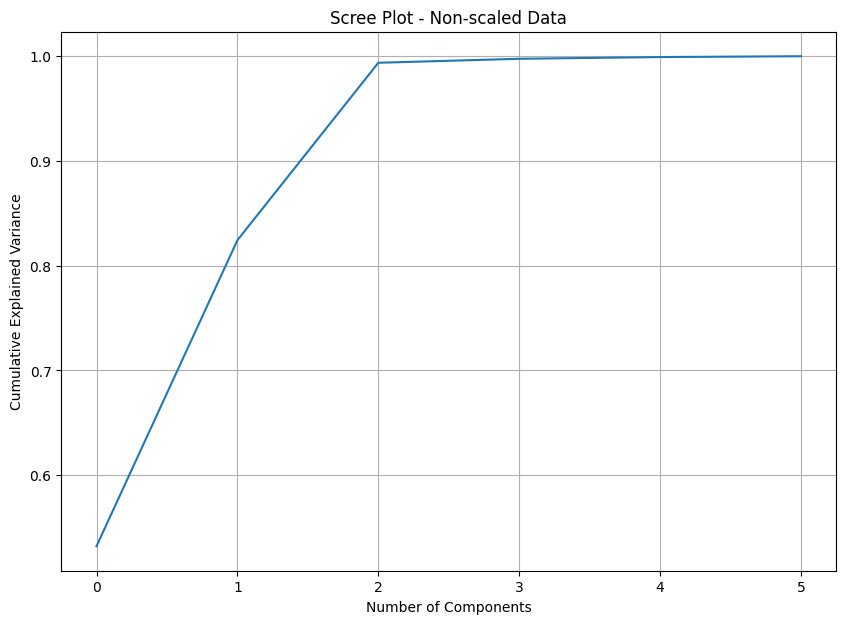

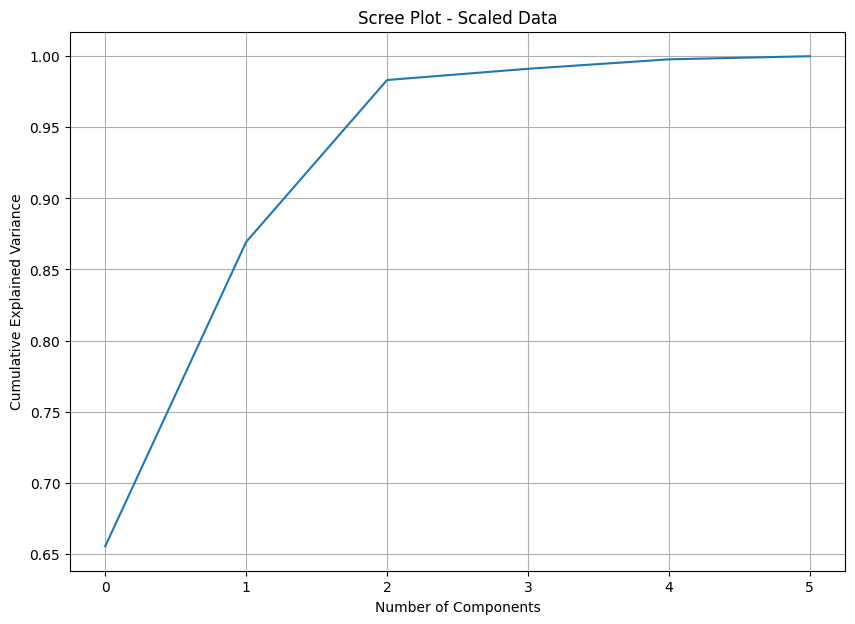

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Perform PCA on non-scaled data
pca_non_scaled = PCA()
pca_non_scaled.fit(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on scaled data
pca_scaled = PCA()
pca_scaled.fit(X_scaled)

# Plot the explained variance (Scree Plot) for non-scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_non_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Non-scaled Data')
plt.grid(True)
plt.show()

# Plot the explained variance (Scree Plot) for scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Scaled Data')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3) # Select 3 features
fit = rfe.fit(X, y)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assume X is your feature set and y is your target variable
selector = SelectKBest(score_func=chi2, k=4) # k is the number of top features to select
fit = selector.fit(X, y)

# Get the scores for each feature
scores = fit.scores_
